In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
#import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(precision=2)

In [2]:
data = pd.read_csv('D:\Data\UCI Datasets\car.data.txt',encoding = 'utf-8',header = None)

In [3]:
data.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
data.columns.tolist()

[0, 1, 2, 3, 4, 5, 6]

In [5]:
data.rename(columns = {0:'buying',1:'maintainence',2:'doors',3:'persons',4:'lug_boot',5:'safety',6:'class'},inplace = True)

In [6]:
data.head(1)

,buying,maintainence,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc


In [7]:
data['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [8]:
cleanup_nums = {"class":     {"unacc": 4, "acc": 3,'good': 2,'vgood':1}
                }

In [9]:
data.replace(cleanup_nums,inplace = True)

In [10]:
data['class'].value_counts()

4    1210
3     384
2      69
1      65
Name: class, dtype: int64

In [11]:
data.dtypes

buying          object
maintainence    object
doors           object
persons         object
lug_boot        object
safety          object
class            int64
dtype: object

In [12]:
target = data['class']

In [13]:
data.drop( ['class'],axis = 1,inplace = True)

In [14]:
data.head(1)

,buying,maintainence,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low


In [15]:
target.head(1)

0    4
Name: class, dtype: int64

### KNN Classifier

In [16]:
data = pd.get_dummies(data)
data.head()

,buying_high,buying_low,buying_med,buying_vhigh,maintainence_high,maintainence_low,maintainence_med,maintainence_vhigh,doors_2,doors_3,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train,X_test,y_train,y_test = train_test_split(data,target,random_state = 0)
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [18]:
X_train.shape,y_train.shape

((1296, 21), (1296L,))

In [19]:
X_test.shape,y_test.shape

((432, 21), (432L,))

In [20]:
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 0.91


### KNN regression: effect of regularization parameter n_neighbors

In [26]:
print('KNN regression: effect of regularization parameter n_neighbors \n')
for this_n in [1, 3, 5,7,9,11,13]:
    knn = KNeighborsClassifier(n_neighbors = this_n).fit(X_train, y_train)
    r2_train = knn.score(X_train, y_train)
    r2_test = knn.score(X_test, y_test)
    print('No of Neighbors = {:.2f}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_n, r2_train, r2_test))

KNN regression: effect of regularization parameter n_neighbors 

No of Neighbors = 1.00, r-squared training: 1.00, r-squared test: 0.78

No of Neighbors = 3.00, r-squared training: 0.93, r-squared test: 0.84

No of Neighbors = 5.00, r-squared training: 0.95, r-squared test: 0.91

No of Neighbors = 7.00, r-squared training: 0.96, r-squared test: 0.93

No of Neighbors = 9.00, r-squared training: 0.96, r-squared test: 0.94

No of Neighbors = 11.00, r-squared training: 0.97, r-squared test: 0.95

No of Neighbors = 13.00, r-squared training: 0.96, r-squared test: 0.92



## No of Neighbors = 11.00, r-squared training: 0.97, r-squared test: 0.95


In [59]:
best_knn = KNeighborsClassifier(n_neighbors = 11).fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(best_knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(best_knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.97
Accuracy of K-NN classifier on test set: 0.95


## Linear SVC Effect of C

In [31]:
from sklearn.svm import LinearSVC
for this_c in [1, 3, 5,7,9,11,13]:
    clf = LinearSVC(C = this_c).fit(X_train, y_train)
# print('Accuracy of Linear SVC classifier on training set: {:.2f}'
#      .format(clf.score(X_train, y_train)))
# print('Accuracy of Linear SVC classifier on test set: {:.2f}'
#      .format(clf.score(X_test, y_test)))
    r2_train = clf.score(X_train, y_train)
    r2_test = clf.score(X_test, y_test)
    print('Cs = {:.2f}, \
    r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_c, r2_train, r2_test))

Cs = 1.00,     r-squared training: 0.90, r-squared test: 0.87

Cs = 3.00,     r-squared training: 0.91, r-squared test: 0.87

Cs = 5.00,     r-squared training: 0.91, r-squared test: 0.87

Cs = 7.00,     r-squared training: 0.91, r-squared test: 0.87

Cs = 9.00,     r-squared training: 0.91, r-squared test: 0.87

Cs = 11.00,     r-squared training: 0.91, r-squared test: 0.87

Cs = 13.00,     r-squared training: 0.91, r-squared test: 0.87



## SVC RBF: effect of  regularization parameter gamma

In [34]:
from sklearn.svm import SVC
print('SVC RBF: effect of  regularization parameter gamma\n')
for this_gamma in [0.01, 1, 10,50]:
    clf = SVC( kernel = 'rbf', gamma=this_gamma).fit(X_train, y_train)
    r2_train = clf.score(X_train, y_train)
    r2_test = clf.score(X_test, y_test)
    print('Gamma = {:.2f}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_gamma, r2_train, r2_test))

SVC RBF: effect of  regularization parameter gamma

Gamma = 0.01, r-squared training: 0.86, r-squared test: 0.81

Gamma = 1.00, r-squared training: 1.00, r-squared test: 0.89

Gamma = 10.00, r-squared training: 1.00, r-squared test: 0.69

Gamma = 50.00, r-squared training: 1.00, r-squared test: 0.69



## SVC RBF: effect of  regularization parameter gamma and C

In [35]:
print('SVC RBF: effect of  regularization parameter gamma and C \n')
for this_gamma in [1, 10,50,100]:
    for this_C in [0.1, 1, 15]:
        
        clf = SVC(    kernel = 'rbf', gamma=this_gamma, C = this_C).fit(X_train, y_train)
        r2_train = clf.score(X_train, y_train)
        r2_test = clf.score(X_test, y_test)
        print('Gamma = {:.2f},C = {:.2f} \
        r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_gamma,this_C, r2_train, r2_test))

SVC RBF: effect of  regularization parameter gamma and C 

Gamma = 1.00,C = 0.10         r-squared training: 0.71, r-squared test: 0.69

Gamma = 1.00,C = 1.00         r-squared training: 1.00, r-squared test: 0.89

Gamma = 1.00,C = 15.00         r-squared training: 1.00, r-squared test: 0.93

Gamma = 10.00,C = 0.10         r-squared training: 0.71, r-squared test: 0.69

Gamma = 10.00,C = 1.00         r-squared training: 1.00, r-squared test: 0.69

Gamma = 10.00,C = 15.00         r-squared training: 1.00, r-squared test: 0.69

Gamma = 50.00,C = 0.10         r-squared training: 0.71, r-squared test: 0.69

Gamma = 50.00,C = 1.00         r-squared training: 1.00, r-squared test: 0.69

Gamma = 50.00,C = 15.00         r-squared training: 1.00, r-squared test: 0.69

Gamma = 100.00,C = 0.10         r-squared training: 0.71, r-squared test: 0.69

Gamma = 100.00,C = 1.00         r-squared training: 1.00, r-squared test: 0.69

Gamma = 100.00,C = 15.00         r-squared training: 1.00, r-squared t

## Decision Tree Classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier
for this_n in [1, 3, 5,7,9,11,13]:
    
    dec = DecisionTreeClassifier(max_depth = this_n).fit(X_train, y_train)

#     print('Accuracy of Decision Tree classifier on training set: {:.2f}'
#      .format(dec.score(X_train, y_train)))
#     print('Accuracy of Decision Tree classifier on test set: {:.2f}'
#      .format(dec.score(X_test, y_test)))
    print('Max Depth = {:.2f}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_n, r2_train, r2_test))

Max Depth = 1.00, r-squared training: 0.96, r-squared test: 0.92

Max Depth = 3.00, r-squared training: 0.96, r-squared test: 0.92

Max Depth = 5.00, r-squared training: 0.96, r-squared test: 0.92

Max Depth = 7.00, r-squared training: 0.96, r-squared test: 0.92

Max Depth = 9.00, r-squared training: 0.96, r-squared test: 0.92

Max Depth = 11.00, r-squared training: 0.96, r-squared test: 0.92

Max Depth = 13.00, r-squared training: 0.96, r-squared test: 0.92



In [29]:
from sklearn.dummy import DummyClassifier

# Negative class (0) is most frequent
dummy_majority = DummyClassifier(strategy = 'stratified').fit(X_train, y_train)
# Therefore the dummy 'most_frequent' classifier always predicts class 0
dummy_majority.score(X_test, y_test)

0.53472222222222221

# Confusion Matrix (for best KNN)

In [51]:
# KNN
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,classification_report
import seaborn as sns
y_predict = best_knn.predict(X_test)
confusion_mc = confusion_matrix(y_test, y_predict)

In [52]:
confusion_mc

array([[ 13,   0,   3,   0],
       [  3,  15,   3,   0],
       [  1,   1,  87,  10],
       [  0,   0,   2, 294]])

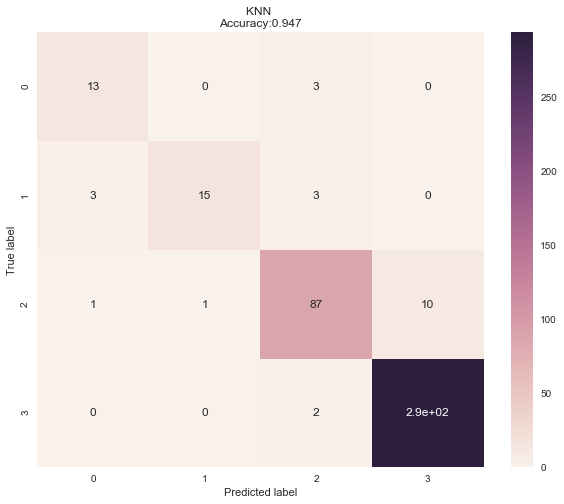

In [53]:
df_cm = pd.DataFrame(confusion_mc, 
                     index = [i for i in range(0,4)], columns = [i for i in range(0,4)])

plt.figure(figsize=(10,8))
sns.heatmap(df_cm, annot=True)
plt.title('KNN \nAccuracy:{0:.3f}'.format(accuracy_score(y_test,y_predict)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Classification Report

In [54]:
print(classification_report(y_test, y_predict))

             precision    recall  f1-score   support

          1       0.76      0.81      0.79        16
          2       0.94      0.71      0.81        21
          3       0.92      0.88      0.90        99
          4       0.97      0.99      0.98       296

avg / total       0.95      0.95      0.95       432



# Micro/Macro

In [55]:
print('Micro-averaged precision = {:.2f} (treat instances equally)'
      .format(precision_score(y_test, y_predict, average = 'micro')))
print('Macro-averaged precision = {:.2f} (treat classes equally)'
      .format(precision_score(y_test, y_predict, average = 'macro')))

Micro-averaged precision = 0.95 (treat instances equally)
Macro-averaged precision = 0.90 (treat classes equally)


## Cross Validation (Clearly shows Why it is important)

In [65]:
from sklearn.model_selection import cross_val_score
# accuracy is the default scoring metric
print('Cross-validation (accuracy)', cross_val_score(best_knn, data, target, cv=5))
print('Mean Cross-validation (accuracy)', cross_val_score(best_knn, data, target, cv=5).mean())


('Cross-validation (accuracy)', array([ 0.66,  0.66,  0.58,  0.88,  0.83]))
('Mean Cross-validation (accuracy)', 0.72292982927812877)


Ouch. This clearly showns that KNN clasifier overfitted even on test data as data had some bias in order or whatever

### CV for Decision Classifier

In [67]:
from sklearn.model_selection import cross_val_score
# accuracy is the default scoring metric
print('Cross-validation (accuracy)', cross_val_score(dec, data, target, cv=5))
print('Mean Cross-validation (accuracy)', cross_val_score(dec, data, target, cv=5).mean())

('Cross-validation (accuracy)', array([ 0.65,  0.73,  0.75,  0.75,  0.81]))
('Mean Cross-validation (accuracy)', 0.73330084688802255)
